# Logistic Regression Continued

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [7]:
path = '../DATA'
filename = 'penguins.csv'

penguins = pd.read_csv(os.path.join(path, filename))

In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [9]:
penguins.drop(columns=penguins.columns[0], inplace=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
# we can see that there are a few nulls there. Let's just drop the nulls

penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


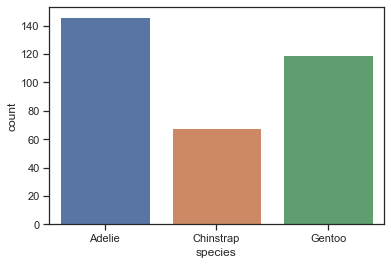

In [11]:
sns.countplot(penguins['species']);

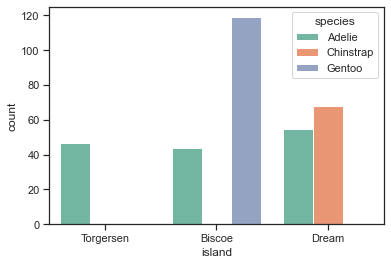

In [12]:
sns.countplot(x='island', hue='species', palette='Set2', data=penguins);

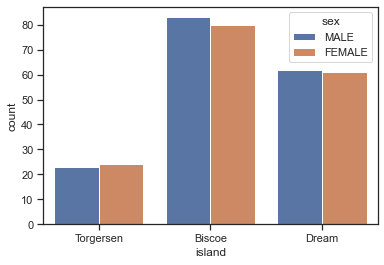

In [13]:
sns.countplot(x='island', hue='sex', data=penguins);

In [40]:
penguins.groupby(['sex', 'species', 'island']).size().reset_index()

,sex,species,island,0
0,FEMALE,Adelie,Biscoe,22
1,FEMALE,Adelie,Dream,27
2,FEMALE,Adelie,Torgersen,24
3,FEMALE,Chinstrap,Dream,34
4,FEMALE,Gentoo,Biscoe,58
5,MALE,Adelie,Biscoe,22
6,MALE,Adelie,Dream,28
7,MALE,Adelie,Torgersen,23
8,MALE,Chinstrap,Dream,34
9,MALE,Gentoo,Biscoe,61


In [15]:
# let's get the male and female penguins on each island
sex = penguins.groupby(['sex', 'species', 'island']).size().reset_index().pivot(columns=['sex'], index=['island', 'species'], values=0)
sex

sex                  FEMALE  MALE
island    species                
Biscoe    Adelie         22    22
          Gentoo         58    61
Dream     Adelie         27    28
          Chinstrap      34    34
Torgersen Adelie         24    23

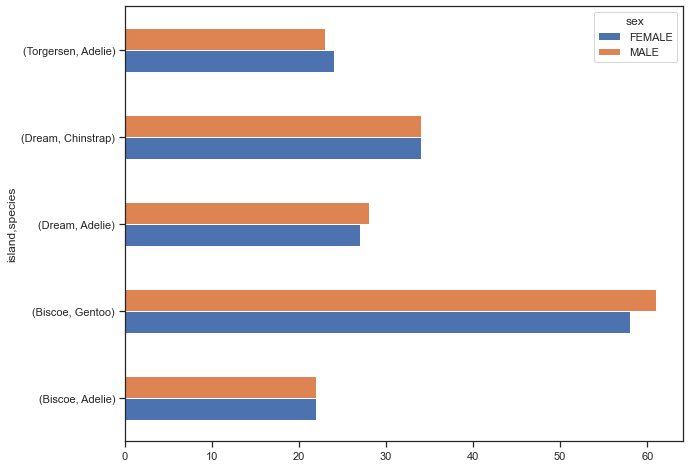

In [41]:
sex.plot.barh(figsize=(10,8));

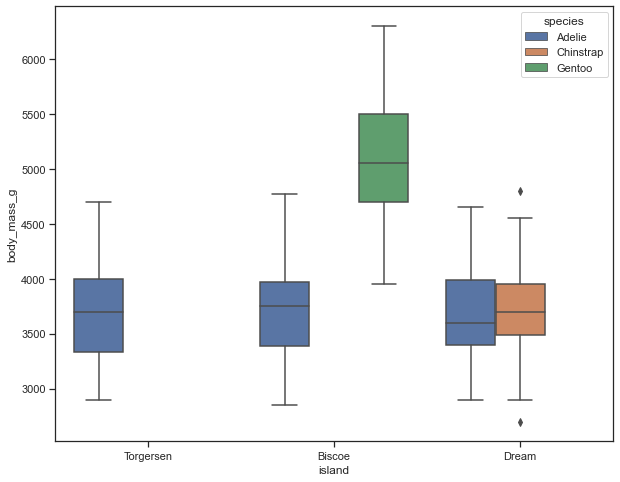

In [50]:
# one species is bigger?
_ , ax = plt.subplots(1,1,figsize=(10,8)) 
sns.boxplot(x='island', y='body_mass_g', hue='species', ax=ax, data=penguins);

In [17]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


So, it looks like we have three categorical variables, all of type object:
species, island, and sex

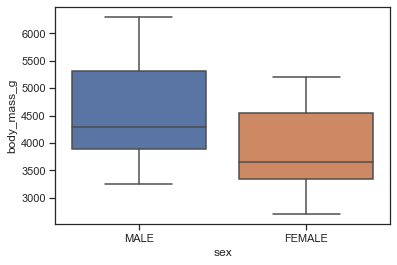

In [24]:
sns.boxplot( 'sex', 'body_mass_g', data=penguins);

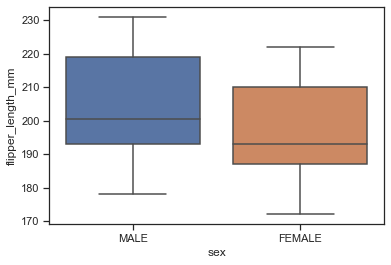

In [25]:
sns.boxplot( 'sex', 'flipper_length_mm', data=penguins);

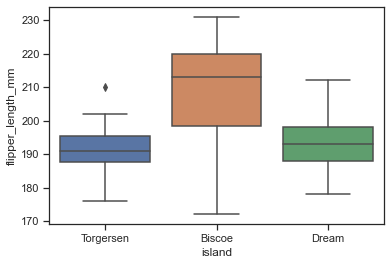

In [26]:
sns.boxplot( 'island', 'flipper_length_mm', data=penguins);

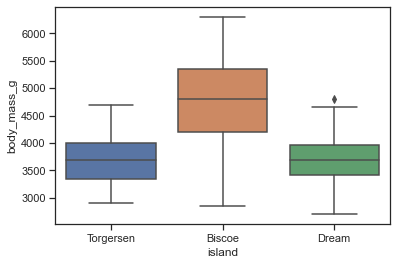

In [27]:
sns.boxplot( 'island', 'body_mass_g', data=penguins);

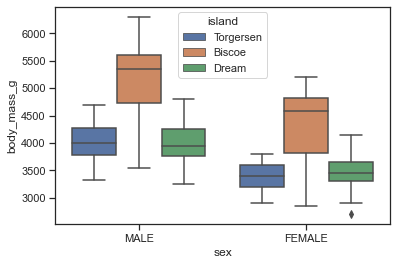

In [28]:
sns.boxplot( 'sex', 'body_mass_g', hue='island', data=penguins);

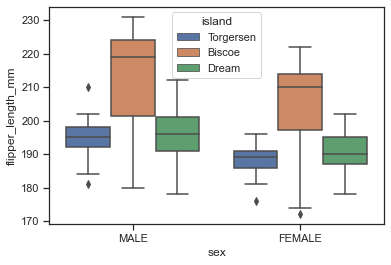

In [29]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='island', data=penguins);

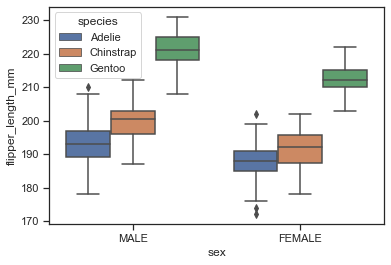

In [34]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='species', data=penguins);

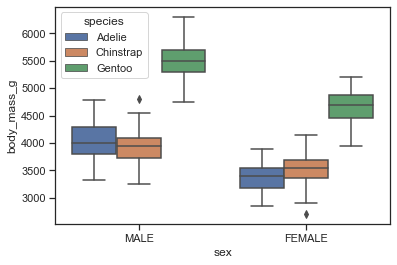

In [35]:
sns.boxplot( 'sex', 'body_mass_g', hue='species', data=penguins);

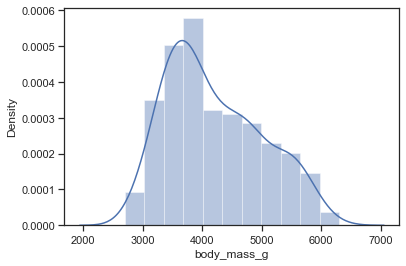

In [36]:
sns.distplot(penguins['body_mass_g']);

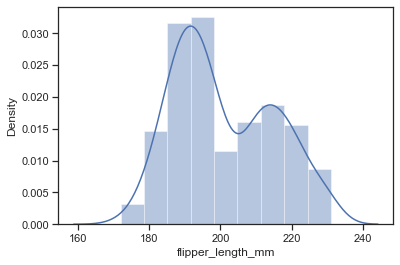

In [37]:
sns.distplot(penguins['flipper_length_mm']);

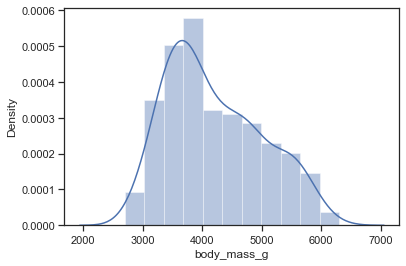

In [38]:
sns.distplot(penguins['body_mass_g']);

## So there is a lot of interesting variations in the penguin 'species' among our three categoricals!
However, to use the smf.logit function, we need BINARY variable

### We need to decide exactly WHAT we want to model.

Suggestions??

In [23]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [24]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.9+ KB


In [25]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(penguins['sex'])
le

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [26]:
penguins.loc[:,'sex_code'] = le
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1


In [27]:
train, test = statsmodels_train_test_split(penguins)

Since sex is the only binary categorical we have in this dataset, it is our only choice!!!

In [28]:
penguins.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [29]:
formula = 'sex ~ C(species) + C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g'


In [30]:
fitted_model = smf.logit(formula=formula, data=train, missing='drop').fit()


fitted_model.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (249, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

## unfortunately, statsmodels cannot deal with objects on the LHS. It likes numbers there! Sigh. 

We have to use the sex_code variable instead


In [31]:
formula = 'sex_code ~ C(species) + C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g'
fitted_model = smf.logit(formula=formula, data=train).fit()


fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.201134
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sex_code   No. Observations:                  249
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Jun 2021   Pseudo R-squ.:                  0.7098
Time:                        14:08:21   Log-Likelihood:                -50.082
converged:                       True   LL-Null:                       -172.59
Covariance Type:            nonrobust   LLR p-value:                 1.959e-48
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -73.7702     12.859     -5.737      0.000     -98.974     -48.566
C(species)[T.Chinstrap]    -6.9391      1.942     -3.572      0.000     -10.746      -3.132
C(species)[T.Gentoo]      -10.0992      3.239     -3.118      0.002     -16.447      -3.752
C(island)[T.Dream]          0.1680      0.881      0.191      0.849      -1.559       1.895
C(island)[T.Torgersen]     -0.4807      0.918     -0.523      0.601      -2.281       1.319
bill_length_mm              0.6341      0.157      4.032      0.000       0.326       0.942
bill_depth_mm               1.3286      0.385      3.450      0.001       0.574       2.083
flipper_length_mm           0.0024      0.053      0.045      0.964      -0.102       0.107
body_mass_g                 0.0066      0.001      4.867      0.000       0.004       0.009
===========================================================================================
"""

In [32]:
fitted_model.predict(test)

331    0.999860
53     0.997830
179    0.857166
299    0.998650
231    0.997390
         ...   
103    0.995658
316    0.839350
252    0.119979
297    0.999974
208    0.000412
Length: 84, dtype: float64

In [33]:
y_pred_test = np.round(fitted_model.predict(test))
y_pred_test

331    1.0
53     1.0
179    1.0
299    1.0
231    1.0
      ... 
103    1.0
316    1.0
252    0.0
297    1.0
208    0.0
Length: 84, dtype: float64

In [34]:
test['sex_code']

331    1
53     1
179    1
299    1
231    1
      ..
103    1
316    1
252    0
297    1
208    0
Name: sex_code, Length: 84, dtype: int64

In [35]:
y_pred_test

331    1.0
53     1.0
179    1.0
299    1.0
231    1.0
      ... 
103    1.0
316    1.0
252    0.0
297    1.0
208    0.0
Length: 84, dtype: float64

In [36]:
confusion_matrix(test['sex_code'], y_pred_test)

array([[38,  2],
       [ 3, 41]])

In [37]:
# So, our model did pretty well, only got 8 wrong from the test set!!!

By definition a confusion matrix `C[i, j]`
    is equal to the number of observations known to be in group `i` and
    predicted by the model to be in group `j`.

### Assignment: Work out the confusion matrix (TP, TN, FP, FN) for the case below BY HAND. Do not use the `confusion_matrix` function.


In [38]:
actual =    [0,0,0,0,0,1,1,1,1,1,1]

In [39]:
predicted = [1,1,0,0,1,0,0,1,1,1,0]

In [40]:
confusion_matrix(actual, predicted)

array([[2, 3],
       [3, 3]])